**Notebook Sections Summary**

Github:

https://github.com/ScottReidux/AAI-510-Group-4

**Problem statement and justification for the proposed approach.**

Investors face significant challenges in predicting stock market movements.
The volatility of the stock market makes it difficult to make informed investment decisions.
This unpredictability can lead to potential financial losses.
Recognizing the stress and uncertainty that investors experience.
Acknowledging the need for reliable tools to aid in decision-making.
Our goal is to provide a solution that helps investors optimize their portfolio.



**Data understanding (EDA) – a graphical and non-graphical representation of relationships between the response variable and predictor variables.**

Please see the seperate EDA notebook in Github.

**Data Preperation**

Please see the seperate EDA notebook in Github.

Key Insights:

Historical trends and patterns in stock prices

Summary statistics like average, highs, and lows

Visual Trend Analysis

Generated plots for each stock observing closing price over time.

Steps Taken:

Date Conversion: Made dates readable by converting them to a standard format.

Sorting: Arranged data by date for accurate analysis.

Handling Missing Data: Filled in missing information to ensure completeness.

Removing Duplicates: Ensured no repeated data entries.

Stationarity Check: Made the data stable for better predictions.


**Feature Engineering**

Enhancing Data - To help capture trends and patterns, improving prediction accuracy


Moving Averages: Calculated average prices over different time periods.

Relative Strength Index (RSI): Measured stock momentum.

Past Prices: Included previous day prices as indicators.


**Feature Selection**

Choosing Important Factors - They have the highest impact on predicting future prices

Selection Method: Used statistical methods to pick the most relevant features.

Key Features Identified: Opening price, highest price, lowest price, volume, moving averages, RSI, and past prices.


**Modeling**

Selection, comparison, tuning, and analysis – consider ensembles.

There are four seperate models below with data prep and feature engineering to enhance their performance.

Models: Random Forrest, XGBoost, LSTM, ARIMA



**Evaluation – performance measures, results, and conclusions.**

The individual models have individual performance statisics

**Discussion and conclusions – address the problem statement and recommendation.**

**S&P 500 comparison with other high performing stocks**

In [1]:
import yfinance as yf
import pandas as pd

# Define the list of stock tickers
tickers = ['AAPL', 'GOOGL', 'GOOG', 'NVDA', 'AMZN', 'DASH', 'MSFT', 'UBER', 'TSLA', 'AMD', 'HPQ', 'DELL', 'META', 'SNOW', 'HOOD', 'PTON', 'AFRM', 'ROKU', 'WISH', 'TOST']
index_ticker = '^GSPC'  # S&P 500

# Define the date range
start_date = '2014-01-01'
end_date = '2024-01-01'

# Function to calculate percentage change
def calculate_percentage_change(data):
    return ((data.iloc[-1] - data.iloc[0]) / data.iloc[0]) * 100

# Download the historical data for the stocks
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Download the historical data for the S&P 500 index
sp500_data = yf.download(index_ticker, start=start_date, end=end_date)['Adj Close']

# Calculate the percentage change over the entire period for each stock
percentage_change = data.apply(calculate_percentage_change)

# Calculate the percentage change over the entire period for the S&P 500 index
sp500_change = calculate_percentage_change(sp500_data)

# Compare each stock's performance to the S&P 500
better_than_sp500 = percentage_change[percentage_change > sp500_change]

# Display the results
print("Stocks that performed better than the S&P 500 from 2014 to 2024:")
print(better_than_sp500)
print(f"\nS&P 500 Percentage Change: {sp500_change:.2f}%")

[**********************85%%***************       ]  17 of 20 completedWARNING:urllib3.connectionpool:Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 10
[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed

Stocks that performed better than the S&P 500 from 2014 to 2024:
Ticker
AAPL       874.606343
AMD       3631.898782
AMZN       663.575139
GOOG       408.330584
GOOGL      401.474457
META       546.974954
MSFT       911.948359
NVDA     12389.785733
TSLA      2383.144411
dtype: float64

S&P 500 Percentage Change: 160.36%


Stocks that performed better than the S&P 500 from 2014 to 2024:

Ticker

AAPL      1011.686759

AMD       3631.898782

AMZN       663.575139

GOOG       408.330600

GOOGL      401.474436

HPQ        222.939383

META       546.974967

MSFT      1101.757924

NVDA     13138.616066

TSLA      2383.144411

dtype: float64

S&P 500 Percentage Change: 160.36%

**Stock performance using processed dataset**


Processing NVDA...



C:\Users\pmall\AppData\Local\Temp\ipykernel_32916\3683208801.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = normalize_data(df['Close'])


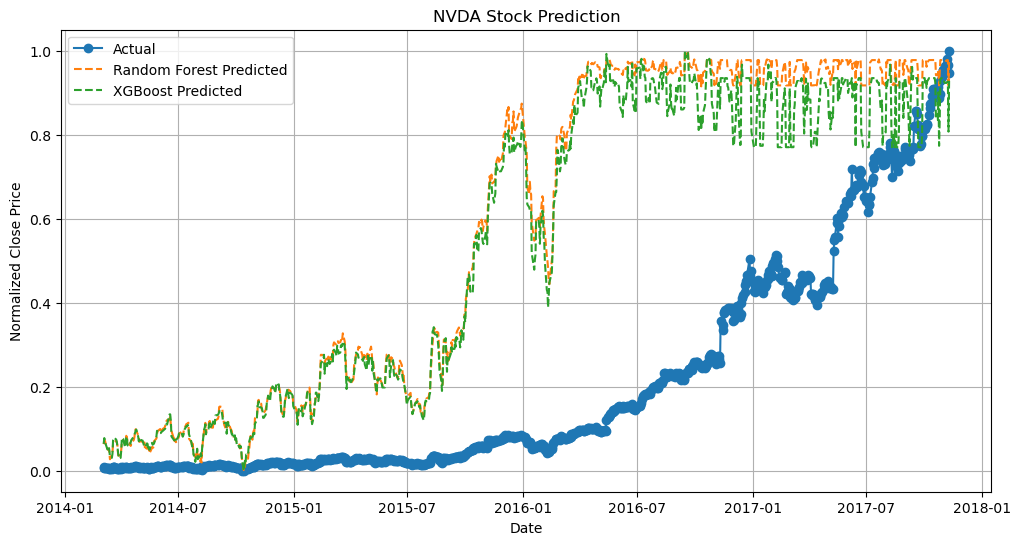

NVDA Random Forest MSE: 0.2108
NVDA XGBoost MSE: 0.1788
NVDA Random Forest MAE: 0.3733
NVDA XGBoost MAE: 0.3392
NVDA Random Forest R²: -2.0600
NVDA XGBoost R²: -1.5947

Processing MSFT...



C:\Users\pmall\AppData\Local\Temp\ipykernel_32916\3683208801.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = normalize_data(df['Close'])


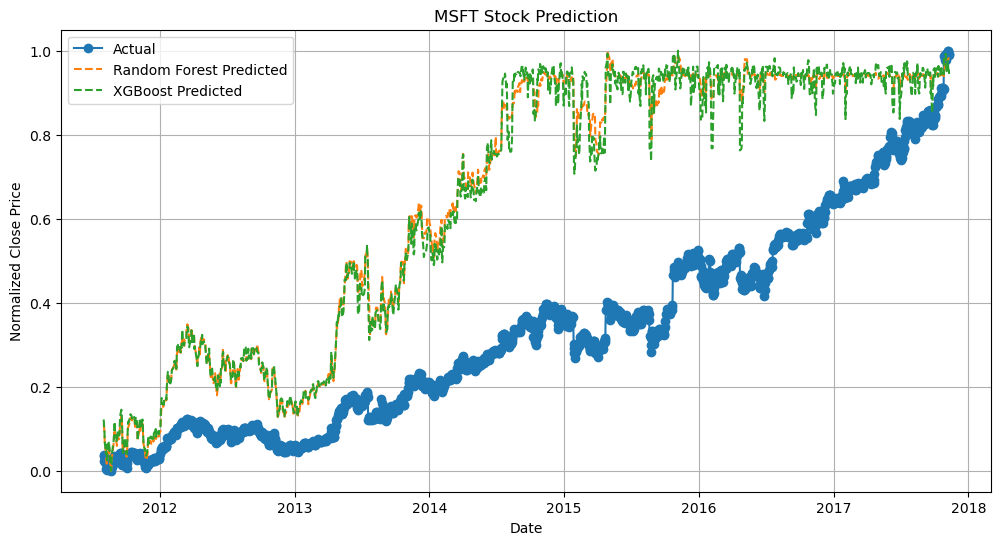

MSFT Random Forest MSE: 0.1342
MSFT XGBoost MSE: 0.1315
MSFT Random Forest MAE: 0.3211
MSFT XGBoost MAE: 0.3176
MSFT Random Forest R²: -1.3216
MSFT XGBoost R²: -1.2746

Processing AMD...



C:\Users\pmall\AppData\Local\Temp\ipykernel_32916\3683208801.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = normalize_data(df['Close'])


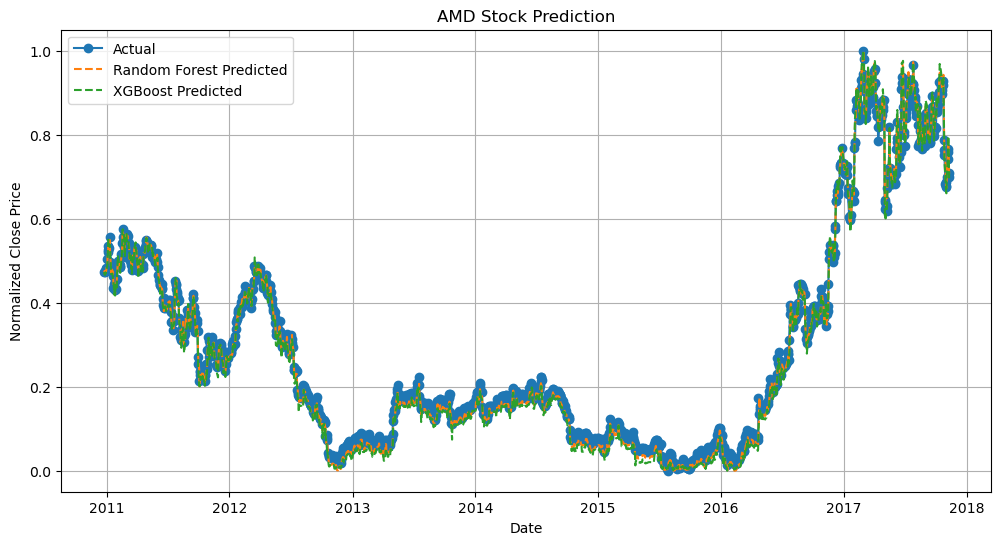

AMD Random Forest MSE: 0.0003
AMD XGBoost MSE: 0.0005
AMD Random Forest MAE: 0.0133
AMD XGBoost MAE: 0.0190
AMD Random Forest R²: 0.9958
AMD XGBoost R²: 0.9923

Processing AAPL...



C:\Users\pmall\AppData\Local\Temp\ipykernel_32916\3683208801.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = normalize_data(df['Close'])


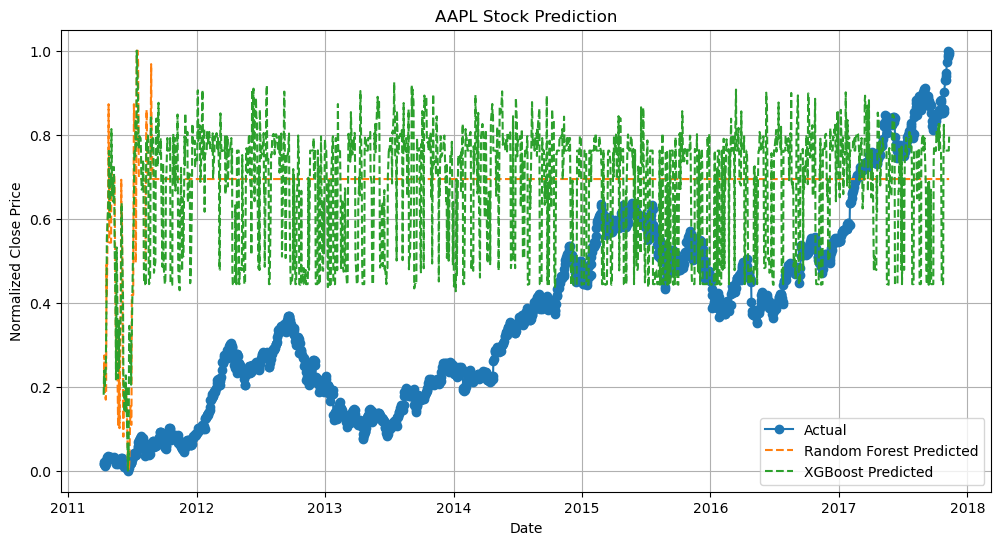

AAPL Random Forest MSE: 0.1468
AAPL XGBoost MSE: 0.1566
AAPL Random Forest MAE: 0.3351
AAPL XGBoost MAE: 0.3353
AAPL Random Forest R²: -1.7676
AAPL XGBoost R²: -1.9516

Processing TSLA...



C:\Users\pmall\AppData\Local\Temp\ipykernel_32916\3683208801.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = normalize_data(df['Close'])


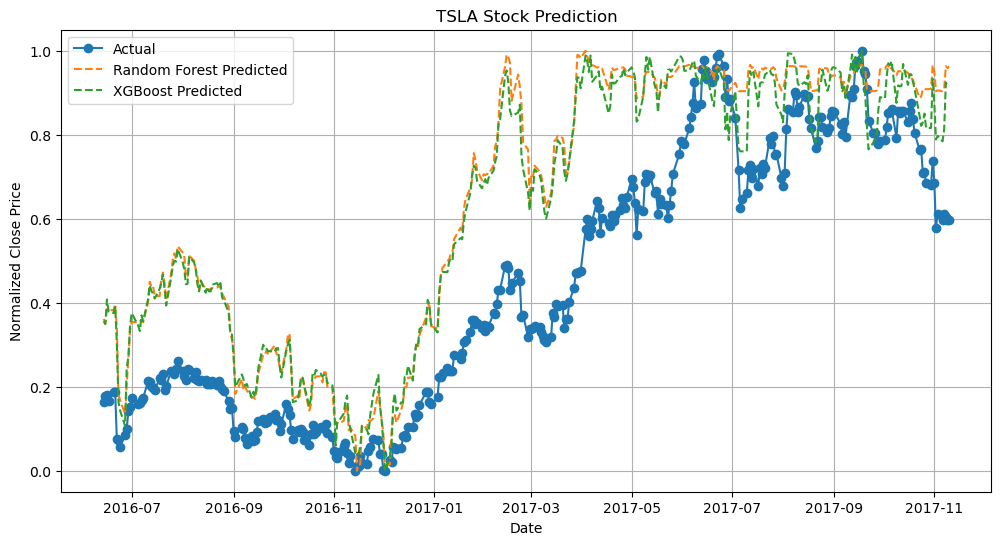

TSLA Random Forest MSE: 0.0553
TSLA XGBoost MSE: 0.0475
TSLA Random Forest MAE: 0.2013
TSLA XGBoost MAE: 0.1874
TSLA Random Forest R²: 0.4178
TSLA XGBoost R²: 0.5000


In [2]:
#  The stock's performance using processed data (not the historical data)
#  Plot actual and predicted values for each stock

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime

# Define the list of stock tickers and corresponding file paths
tickers = ['NVDA', 'MSFT', 'AMD', 'AAPL', 'TSLA']
file_paths = {
    'NVDA': r'C:\USD\Machine Learning - Fundamentals AAI 510\Final Team Project\processed\processed\processed_nvda.us.txt',
    'MSFT': r'C:\USD\Machine Learning - Fundamentals AAI 510\Final Team Project\processed\processed\processed_msft.us.txt',
    'AMD': r'C:\USD\Machine Learning - Fundamentals AAI 510\Final Team Project\processed\processed\processed_amd.us.txt',
    'AAPL': r'C:\USD\Machine Learning - Fundamentals AAI 510\Final Team Project\processed\processed\processed_aapl.us.txt',
    'AMZN': r'C:\USD\Machine Learning - Fundamentals AAI 510\Final Team Project\processed\processed\processed_amzn.us.txt',
    'TSLA': r'C:\USD\Machine Learning - Fundamentals AAI 510\Final Team Project\processed\processed\processed_tsla.us.txt'
}

# Define the date range
start_date = '2014-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Function to create lag features
def create_lag_features(df, lags):
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['Close'].shift(lag)
    df['rolling_mean_5'] = df['Close'].rolling(window=5).mean()
    df['rolling_std_5'] = df['Close'].rolling(window=5).std()
    df['rolling_mean_10'] = df['Close'].rolling(window=10).mean()
    df['rolling_std_10'] = df['Close'].rolling(window=10).std()
    df['rolling_mean_20'] = df['Close'].rolling(window=20).mean()
    df['rolling_std_20'] = df['Close'].rolling(window=20).std()
    df['momentum'] = df['Close'] - df['Close'].shift(4)
    return df.dropna()

# Function to normalize data
def normalize_data(df):
    return (df - df.min()) / (df.max() - df.min())

# Function to fit and predict using Random Forest and XGBoost
def fit_and_predict(df, ticker):
    # Create lag features
    df = create_lag_features(df, 7)

    # Define features and target
    features = [f'lag_{i}' for i in range(1, 8)] + ['rolling_mean_5', 'rolling_std_5', 'rolling_mean_10', 'rolling_std_10', 'rolling_mean_20', 'rolling_std_20', 'momentum']
    X = df[features]
    y = df['Close']

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    # Hyperparameter tuning for Random Forest
    rf_params = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    }
    rf_model = RandomForestRegressor(random_state=42)
    rf_random = RandomizedSearchCV(rf_model, rf_params, n_iter=20, cv=3, n_jobs=-1, random_state=42, scoring='neg_mean_squared_error')
    rf_random.fit(X_train, y_train)
    rf_best_model = rf_random.best_estimator_

    # Predict with Random Forest
    y_pred_rf = rf_best_model.predict(X_test)

    # Hyperparameter tuning for XGBoost
    xgb_params = {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
    xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_random = RandomizedSearchCV(xgb_model, xgb_params, n_iter=20, cv=3, n_jobs=-1, random_state=42, scoring='neg_mean_squared_error')
    xgb_random.fit(X_train, y_train)
    xgb_best_model = xgb_random.best_estimator_

    # Predict with XGBoost
    y_pred_xgb = xgb_best_model.predict(X_test)

    # Normalize the data for comparison
    df['Close'] = normalize_data(df['Close'])
    y_test = normalize_data(y_test)
    y_pred_rf = normalize_data(pd.Series(y_pred_rf, index=y_test.index))
    y_pred_xgb = normalize_data(pd.Series(y_pred_xgb, index=y_test.index))

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[-len(y_test):], y_test, label='Actual', marker='o')
    plt.plot(df.index[-len(y_test):], y_pred_rf, label='Random Forest Predicted', linestyle='--')
    plt.plot(df.index[-len(y_test):], y_pred_xgb, label='XGBoost Predicted', linestyle='--')
    plt.title(f'{ticker} Stock Prediction')
    plt.xlabel('Date')
    plt.ylabel('Normalized Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print evaluation metrics
    print(f'{ticker} Random Forest MSE: {mean_squared_error(y_test, y_pred_rf):.4f}')
    print(f'{ticker} XGBoost MSE: {mean_squared_error(y_test, y_pred_xgb):.4f}')
    print(f'{ticker} Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf):.4f}')
    print(f'{ticker} XGBoost MAE: {mean_absolute_error(y_test, y_pred_xgb):.4f}')
    print(f'{ticker} Random Forest R²: {r2_score(y_test, y_pred_rf):.4f}')
    print(f'{ticker} XGBoost R²: {r2_score(y_test, y_pred_xgb):.4f}')

# Load and process each stock data
for ticker in tickers:
    print(f'\nProcessing {ticker}...\n')
    file_path = file_paths[ticker]
    df_ticker = pd.read_csv(file_path)
    df_ticker['Date'] = pd.to_datetime(df_ticker['Date'])
    df_ticker.set_index('Date', inplace=True)
    fit_and_predict(df_ticker, ticker)

**Stock performance using historical data again SP 500**

c:\Users\pmall\anaconda4\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed



Processing NVDA...



C:\Users\pmall\AppData\Local\Temp\ipykernel_32916\3369627734.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = normalize_data(df['Close'])


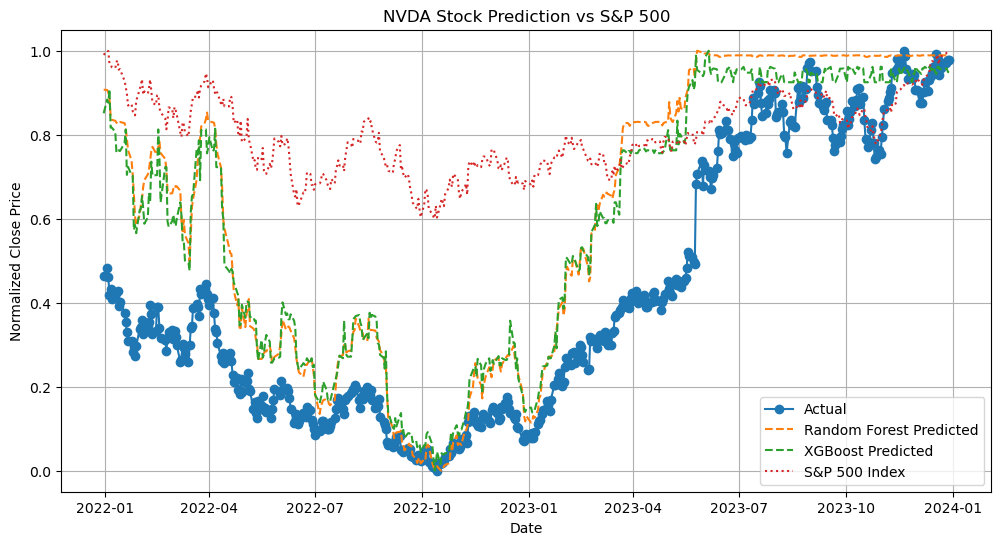

NVDA Random Forest MSE: 0.0552
NVDA XGBoost MSE: 0.0444
NVDA Random Forest MAE: 0.1898
NVDA XGBoost MAE: 0.1719
NVDA Random Forest R²: 0.4309
NVDA XGBoost R²: 0.5424

Processing MSFT...



C:\Users\pmall\AppData\Local\Temp\ipykernel_32916\3369627734.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = normalize_data(df['Close'])


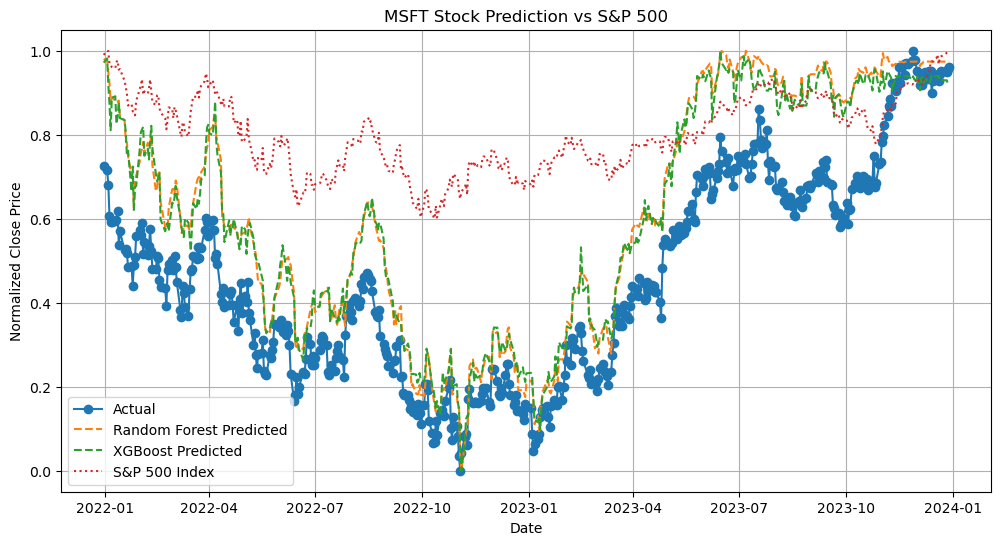

MSFT Random Forest MSE: 0.0311
MSFT XGBoost MSE: 0.0287
MSFT Random Forest MAE: 0.1550
MSFT XGBoost MAE: 0.1495
MSFT Random Forest R²: 0.4725
MSFT XGBoost R²: 0.5134

Processing AMD...



C:\Users\pmall\AppData\Local\Temp\ipykernel_32916\3369627734.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = normalize_data(df['Close'])


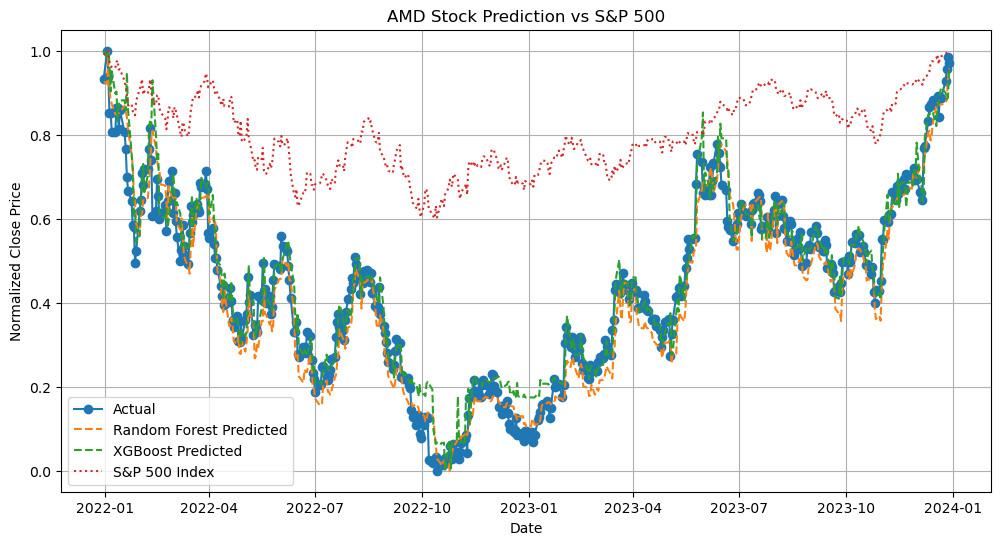

AMD Random Forest MSE: 0.0030
AMD XGBoost MSE: 0.0029
AMD Random Forest MAE: 0.0448
AMD XGBoost MAE: 0.0385
AMD Random Forest R²: 0.9360
AMD XGBoost R²: 0.9397

Processing AAPL...



C:\Users\pmall\AppData\Local\Temp\ipykernel_32916\3369627734.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = normalize_data(df['Close'])


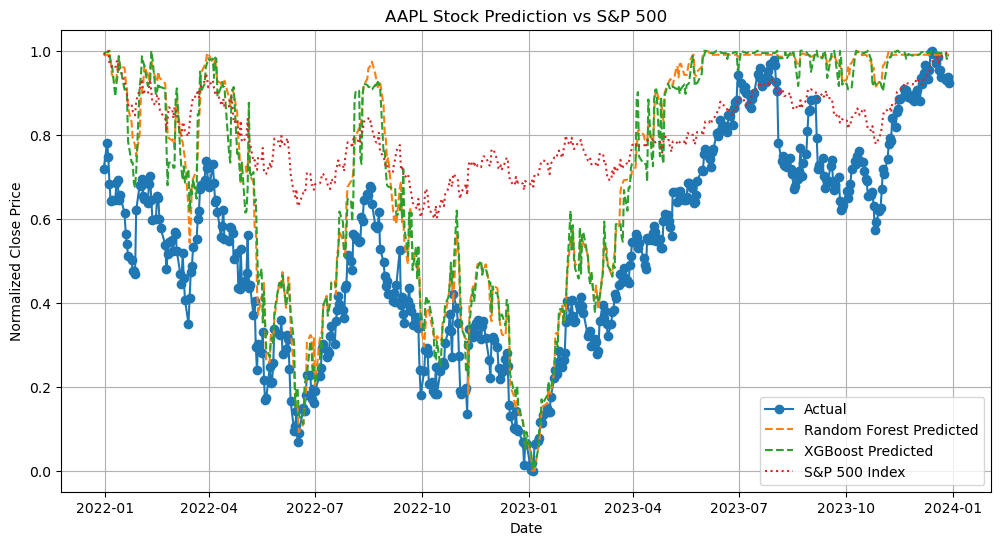

AAPL Random Forest MSE: 0.0455
AAPL XGBoost MSE: 0.0427
AAPL Random Forest MAE: 0.1869
AAPL XGBoost MAE: 0.1811
AAPL Random Forest R²: 0.2218
AAPL XGBoost R²: 0.2704

Processing AMZN...



C:\Users\pmall\AppData\Local\Temp\ipykernel_32916\3369627734.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = normalize_data(df['Close'])


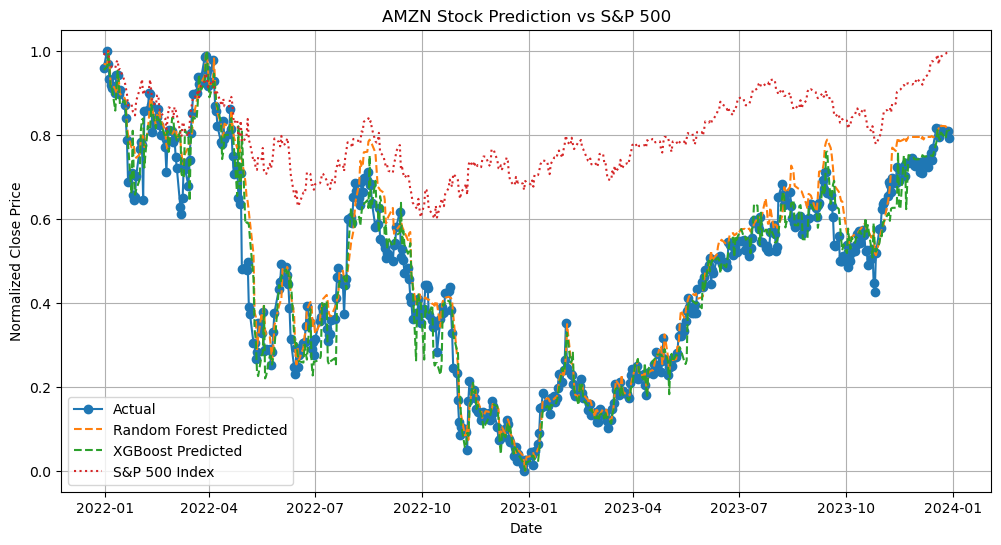

AMZN Random Forest MSE: 0.0037
AMZN XGBoost MSE: 0.0031
AMZN Random Forest MAE: 0.0451
AMZN XGBoost MAE: 0.0405
AMZN Random Forest R²: 0.9390
AMZN XGBoost R²: 0.9490


In [1]:
#  Compare each stock's performance against S&P500 using historical data.
#  Plot actual and predicted values for each stock along withe S&P500 index values

import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the list of stock tickers
tickers = ['NVDA', 'MSFT', 'AMD', 'AAPL', 'AMZN']
index_ticker = '^GSPC'  # S&P 500

# Define the date range
start_date = '2014-01-01'
end_date = '2024-01-01'

# Function to create lag features
def create_lag_features(df, lags):
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['Close'].shift(lag)
    df['rolling_mean_5'] = df['Close'].rolling(window=5).mean()
    df['rolling_std_5'] = df['Close'].rolling(window=5).std()
    return df.dropna()

# Function to normalize data
def normalize_data(df):
    return (df - df.min()) / (df.max() - df.min())

# Function to fit and predict using Random Forest and XGBoost
def fit_and_predict(df, sp500_df, ticker):
    # Create lag features
    df = create_lag_features(df, 7)

    # Define features and target
    features = [f'lag_{i}' for i in range(1, 8)] + ['rolling_mean_5', 'rolling_std_5']
    X = df[features]
    y = df['Close']

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    # Hyperparameter tuning for Random Forest
    rf_params = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
    rf_model = RandomForestRegressor(random_state=42)
    rf_grid = GridSearchCV(rf_model, rf_params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
    rf_grid.fit(X_train, y_train)
    rf_best_model = rf_grid.best_estimator_

    # Predict with Random Forest
    y_pred_rf = rf_best_model.predict(X_test)

    # Hyperparameter tuning for XGBoost
    xgb_params = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2]
    }
    xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
    xgb_grid.fit(X_train, y_train)
    xgb_best_model = xgb_grid.best_estimator_

    # Predict with XGBoost
    y_pred_xgb = xgb_best_model.predict(X_test)

    # Normalize the data for comparison
    df['Close'] = normalize_data(df['Close'])
    y_test = normalize_data(y_test)
    y_pred_rf = normalize_data(pd.Series(y_pred_rf, index=y_test.index))
    y_pred_xgb = normalize_data(pd.Series(y_pred_xgb, index=y_test.index))
    sp500_df['Close'] = normalize_data(sp500_df['Close'])

    # Plot actual vs predicted with S&P 500 index
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[-len(y_test):], y_test, label='Actual', marker='o')
    plt.plot(df.index[-len(y_test):], y_pred_rf, label='Random Forest Predicted', linestyle='--')
    plt.plot(df.index[-len(y_test):], y_pred_xgb, label='XGBoost Predicted', linestyle='--')
    plt.plot(sp500_df.index[-len(y_test):], sp500_df['Close'][-len(y_test):], label='S&P 500 Index', linestyle=':')
    plt.title(f'{ticker} Stock Prediction vs S&P 500')
    plt.xlabel('Date')
    plt.ylabel('Normalized Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print evaluation metrics
    print(f'{ticker} Random Forest MSE: {mean_squared_error(y_test, y_pred_rf):.4f}')
    print(f'{ticker} XGBoost MSE: {mean_squared_error(y_test, y_pred_xgb):.4f}')
    print(f'{ticker} Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf):.4f}')
    print(f'{ticker} XGBoost MAE: {mean_absolute_error(y_test, y_pred_xgb):.4f}')
    print(f'{ticker} Random Forest R²: {r2_score(y_test, y_pred_rf):.4f}')
    print(f'{ticker} XGBoost R²: {r2_score(y_test, y_pred_xgb):.4f}')

# Download historical data for the stocks and S&P 500
data = yf.download(tickers, start=start_date, end=end_date)
sp500_data = yf.download(index_ticker, start=start_date, end=end_date)['Adj Close'].reset_index()
sp500_data = sp500_data.rename(columns={'Adj Close': 'Close'}).set_index('Date')

# Fit and predict for each stock
for ticker in tickers:
    print(f'\nProcessing {ticker}...\n')
    df_ticker = data['Adj Close'][ticker].reset_index().rename(columns={ticker: 'Close'})
    df_ticker.set_index('Date', inplace=True)
    fit_and_predict(df_ticker, sp500_data, ticker)

**LSTM Model**

**Target Stocks**

Apple - AAPL

Google (Alphabet Inc.) - GOOGL (for Class A shares)

Nvidia - NVDA

Amazon - AMZN

Microsoft - MSFT

AMD (Advanced Micro Devices) - AMD

HP (HP Inc., not to be confused with Hewlett Packard Enterprise) - HPQ

QUALCOMM Incorporated - QCOM

Salesforce, Inc. - CRM

Cisco Systems, Inc. - CSCO

Oracle Corporation - ORCL

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/combined_stocks.csv')

# Print the first 5 rows of the DataFrame
print(df.head())


       Open      High       Low    Volume  OpenInt  Close_diff    SMA_20  \
0 -0.582426 -0.583369 -0.581442 -0.611224      0.0   -0.043755 -0.582003   
1 -0.582629 -0.583638 -0.581954 -0.422803      0.0   -0.065264 -0.582078   
2 -0.582900 -0.583940 -0.581648 -0.337979      0.0   -0.014456 -0.582150   
3 -0.582697 -0.583705 -0.581442 -0.574871      0.0   -0.020246 -0.582216   
4 -0.582562 -0.583369 -0.581306 -0.691591      0.0   -0.016396 -0.582249   

     SMA_50    EMA_20       RSI     Lag_1     Lag_2        Date    Close  \
0 -0.581412 -0.582225 -0.741786 -0.582323 -0.582328  1984-11-16  0.37138   
1 -0.581450 -0.582329 -1.238881 -0.582527 -0.582328  1984-11-19  0.34962   
2 -0.581487 -0.582393 -0.897810 -0.583102 -0.582532  1984-11-20  0.36112   
3 -0.581513 -0.582432 -0.776038 -0.582798 -0.583108  1984-11-21  0.36883   
4 -0.581545 -0.582441 -0.516171 -0.582594 -0.582803  1984-11-23  0.37906   

  Ticker  
0   AAPL  
1   AAPL  
2   AAPL  
3   AAPL  
4   AAPL  


[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-5c01b99b1113>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_data['Percent_Return'] = index_data['Close'].pct_change()
<ipython-input-2-5c01b99b1113>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticker.loc[:, 'Percent_Return'] = df_ticker['Close'].pct_change()


Processing NVDA
Epoch 1/20
29/29 [==============================] - 5s 5ms/step - loss: 0.0440
Epoch 2/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 3/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 4/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 5/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 6/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 7/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 8/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 9/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 10/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 11/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 12/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 13/20
29/29 [==============

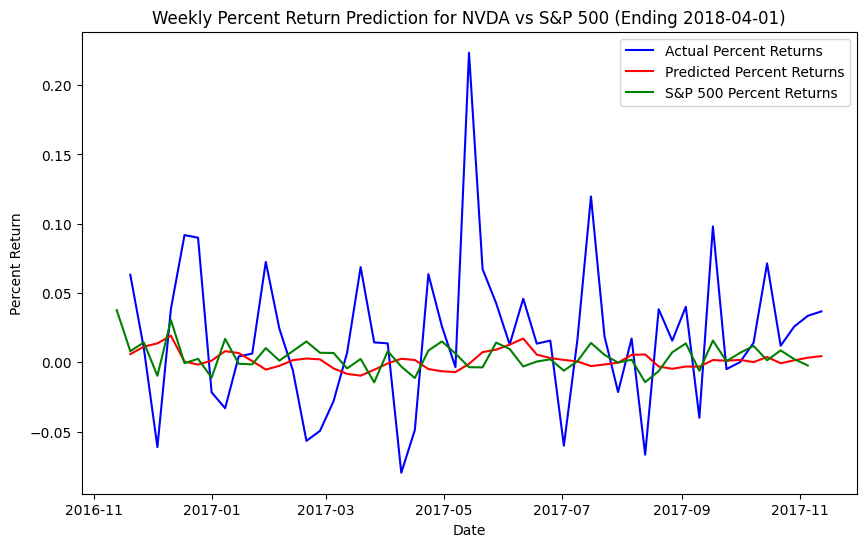

Metrics for NVDA: MSE: 0.0032198218343621405, RMSE: 0.05674347393632276, MAE: 0.04113056425774402, MAPE: 117.02296086891803%, R^2: -0.15204697545786483
Processing MSFT


<ipython-input-2-5c01b99b1113>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticker.loc[:, 'Percent_Return'] = df_ticker['Close'].pct_change()


Epoch 1/20
50/50 [==============================] - 3s 5ms/step - loss: 0.0517
Epoch 2/20
50/50 [==============================] - 0s 4ms/step - loss: 0.0150
Epoch 3/20
50/50 [==============================] - 0s 4ms/step - loss: 0.0142
Epoch 4/20
50/50 [==============================] - 0s 4ms/step - loss: 0.0142
Epoch 5/20
50/50 [==============================] - 0s 5ms/step - loss: 0.0145
Epoch 6/20
50/50 [==============================] - 0s 4ms/step - loss: 0.0143
Epoch 7/20
50/50 [==============================] - 0s 4ms/step - loss: 0.0141
Epoch 8/20
50/50 [==============================] - 0s 5ms/step - loss: 0.0142
Epoch 9/20
50/50 [==============================] - 0s 5ms/step - loss: 0.0134
Epoch 10/20
50/50 [==============================] - 0s 5ms/step - loss: 0.0137
Epoch 11/20
50/50 [==============================] - 0s 4ms/step - loss: 0.0137
Epoch 12/20
50/50 [==============================] - 0s 4ms/step - loss: 0.0133
Epoch 13/20
50/50 [==============================

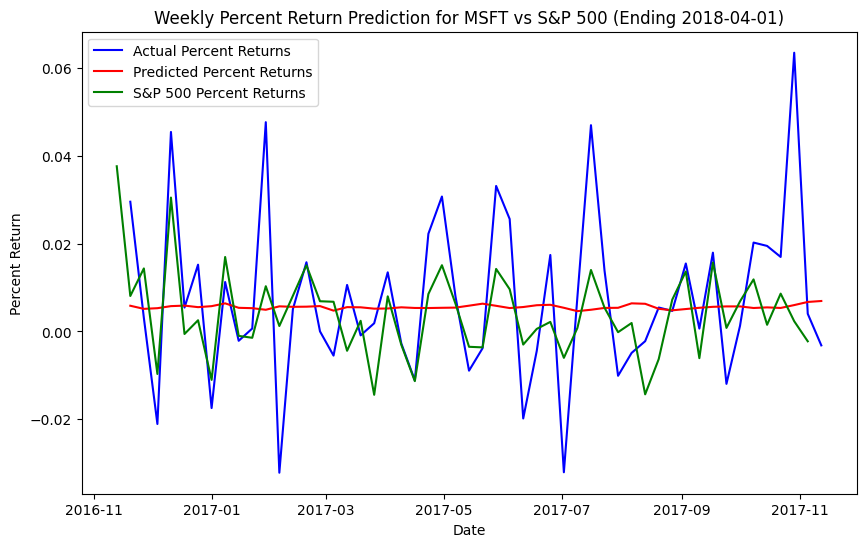

Metrics for MSFT: MSE: 0.0003678933845385494, RMSE: 0.01918054703439267, MAE: 0.01440444305792136, MAPE: 1061.5709716151323%, R^2: -0.014968699492578397
Processing AMD


<ipython-input-2-5c01b99b1113>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticker.loc[:, 'Percent_Return'] = df_ticker['Close'].pct_change()


Epoch 1/20
55/55 [==============================] - 3s 5ms/step - loss: 0.0423
Epoch 2/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0101
Epoch 3/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 4/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0099
Epoch 5/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0096
Epoch 6/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0099
Epoch 7/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0096
Epoch 8/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 9/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0098
Epoch 10/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0095
Epoch 11/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 12/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0093
Epoch 13/20
55/55 [==============================

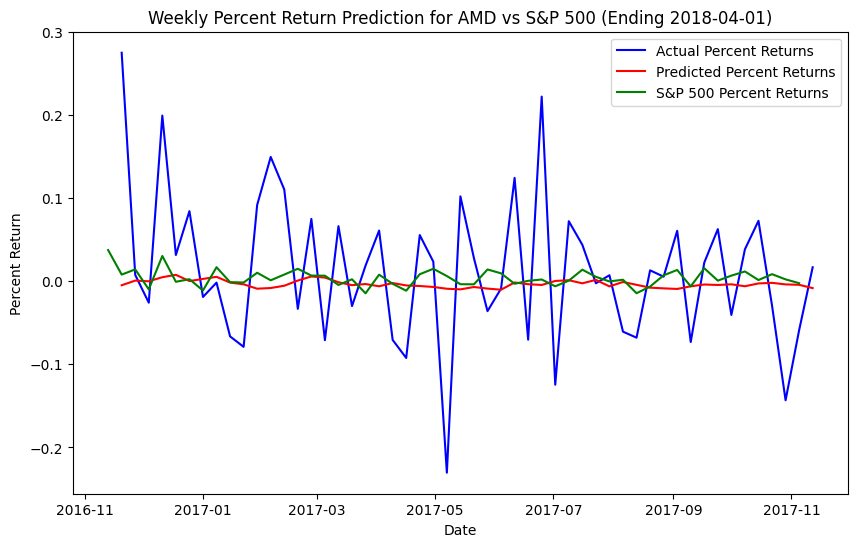

Metrics for AMD: MSE: 0.00839008961748597, RMSE: 0.09159743237387154, MAE: 0.06990156916028338, MAPE: 114.14506781900629%, R^2: -0.03664752896154777
Processing AAPL


<ipython-input-2-5c01b99b1113>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticker.loc[:, 'Percent_Return'] = df_ticker['Close'].pct_change()


Epoch 1/20
53/53 [==============================] - 3s 5ms/step - loss: 0.0520
Epoch 2/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0082
Epoch 3/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 4/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0079
Epoch 5/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 6/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 7/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 8/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 9/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 10/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 11/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 12/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 13/20
53/53 [==============================

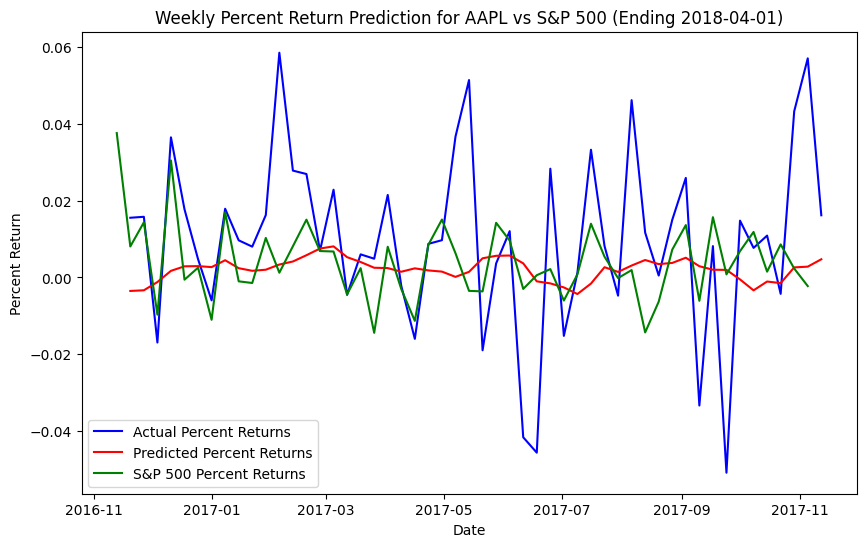

Metrics for AAPL: MSE: 0.0005944072379051202, RMSE: 0.02438046836927298, MAE: 0.018706565050398395, MAPE: 108.39597032484708%, R^2: -0.10163711504859707
Processing AMZN


<ipython-input-2-5c01b99b1113>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticker.loc[:, 'Percent_Return'] = df_ticker['Close'].pct_change()


Epoch 1/20
32/32 [==============================] - 3s 5ms/step - loss: 0.0437
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0099
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 5/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0088
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 8/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0087
Epoch 9/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0087
Epoch 10/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0084
Epoch 11/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0084
Epoch 12/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 13/20
32/32 [==============================

2/2 [==============================] - 1s 5ms/step


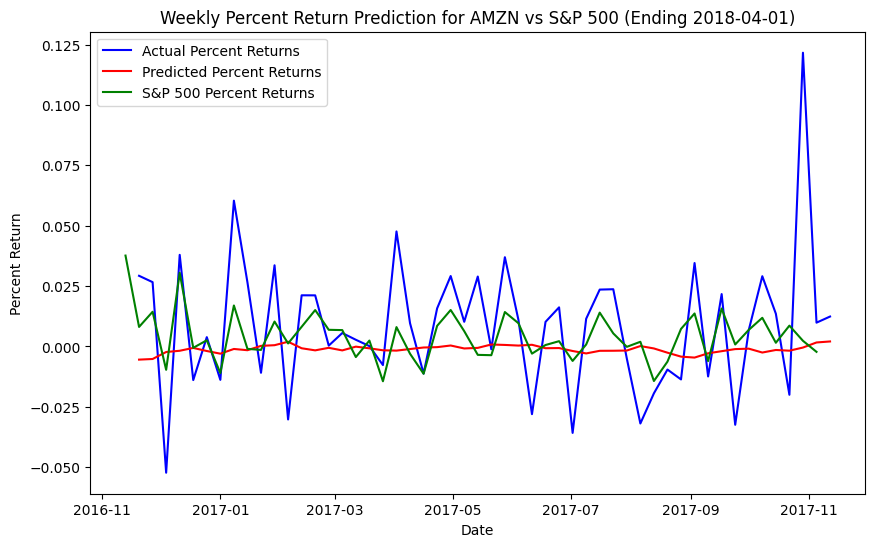

Metrics for AMZN: MSE: 0.0008846094904838524, RMSE: 0.029742385420202133, MAE: 0.022367633526838255, MAPE: 116.90384362864985%, R^2: -0.13131432992815606


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import yfinance as yf

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/combined_stocks.csv')

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Filtering data for the relevant years
df = df[(df['Date'] < '2019-01-01')]

# Download S&P 500 data
index_data = yf.download('^GSPC', start='2016-11-01', end='2017-11-01')
index_data.reset_index(inplace=True)  # Resetting the index so 'Date' becomes a column
index_data = index_data[['Date', 'Close']]
index_data['Percent_Return'] = index_data['Close'].pct_change()

# Resample to weekly data and sum percent returns
index_data.set_index('Date', inplace=True)  # Set 'Date' as the index again for resampling
index_data = index_data.resample('W').sum()  # Summing weekly percent returns

# List of tickers to process
tickers = ['NVDA', 'MSFT', 'AMD', 'AAPL', 'AMZN']

results = {}

for ticker in tickers:
    print(f"Processing {ticker}")
    df_ticker = df[df['Ticker'] == ticker]
    df_ticker.set_index('Date', inplace=True)
    df_ticker.loc[:, 'Percent_Return'] = df_ticker['Close'].pct_change()
    df_ticker = df_ticker.resample('W').sum()  # Summing weekly percent returns

    # Prepare data for LSTM
    scaler = MinMaxScaler(feature_range=(0, 1))
    returns = df_ticker['Percent_Return'].dropna().values.reshape(-1, 1)
    scaled_data = scaler.fit_transform(returns)

    # Create the training data
    n_past = 4  # Adjusted for weekly data
    X_train, y_train = [], []
    for i in range(n_past, len(scaled_data)-52):  # Reserving the last year for testing, adjusted for weeks
        X_train.append(scaled_data[i-n_past:i, 0])
        y_train.append(scaled_data[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    # Compile and fit the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=20, batch_size=32)

    # Predicting values
    test_data = scaled_data[-(n_past+52):]  # Last year data + 4 weeks
    X_test = []
    for i in range(n_past, len(test_data)):
        X_test.append(test_data[i-n_past:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_returns = model.predict(X_test)
    predicted_returns = scaler.inverse_transform(predicted_returns)

    # Actual percent returns
    actual_returns = df_ticker['Percent_Return'].tail(52).values  # Last year of weekly data

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_ticker.index[-52:], actual_returns, color='blue', label='Actual Percent Returns')
    plt.plot(df_ticker.index[-52:], predicted_returns[:, 0], color='red', label='Predicted Percent Returns')

    # Include S&P 500 percent returns for comparison
    sp500_returns = index_data['Percent_Return'].tail(52).dropna()  # last year weekly data
    plt.plot(sp500_returns.index, sp500_returns.values, color='green', label='S&P 500 Percent Returns')

    plt.title(f'Weekly Percent Return Prediction for {ticker} vs S&P 500 (Ending 2018-04-01)')
    plt.xlabel('Date')
    plt.ylabel('Percent Return')
    plt.legend()
    plt.show()

    # Store results
    results[ticker] = predicted_returns

    # Calculate statistics
    mse = mean_squared_error(actual_returns, predicted_returns[:, 0])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual_returns, predicted_returns[:, 0])
    mape = np.mean(np.abs((actual_returns - predicted_returns[:, 0]) / actual_returns)) * 100
    r2 = r2_score(actual_returns, predicted_returns[:, 0])

    # Print statistics
    print(f"Metrics for {ticker}: MSE: {mse}, RMSE: {rmse}, MAE: {mae}, MAPE: {mape}%, R^2: {r2}")

**ARIMA Model** (not used in presentation)

In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/combined_stocks.csv')

# Print the first 5 rows of the DataFrame
print(df.head())

       Open      High       Low    Volume  OpenInt  Close_diff    SMA_20  \
0 -0.582426 -0.583369 -0.581442 -0.611224      0.0   -0.043755 -0.582003   
1 -0.582629 -0.583638 -0.581954 -0.422803      0.0   -0.065264 -0.582078   
2 -0.582900 -0.583940 -0.581648 -0.337979      0.0   -0.014456 -0.582150   
3 -0.582697 -0.583705 -0.581442 -0.574871      0.0   -0.020246 -0.582216   
4 -0.582562 -0.583369 -0.581306 -0.691591      0.0   -0.016396 -0.582249   

     SMA_50    EMA_20       RSI     Lag_1     Lag_2        Date    Close  \
0 -0.581412 -0.582225 -0.741786 -0.582323 -0.582328  1984-11-16  0.37138   
1 -0.581450 -0.582329 -1.238881 -0.582527 -0.582328  1984-11-19  0.34962   
2 -0.581487 -0.582393 -0.897810 -0.583102 -0.582532  1984-11-20  0.36112   
3 -0.581513 -0.582432 -0.776038 -0.582798 -0.583108  1984-11-21  0.36883   
4 -0.581545 -0.582441 -0.516171 -0.582594 -0.582803  1984-11-23  0.37906   

  Ticker  
0   AAPL  
1   AAPL  
2   AAPL  
3   AAPL  
4   AAPL  


In [4]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Define start and end dates
start_date = '2008-01-01'
end_date = '2018-01-01'

# Slice the DataFrame to include only data within the specified date range
# Make a copy to avoid SettingWithCopyWarning when modifying this slice
selected_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()

# Calculate daily returns
selected_data['Daily_Return'] = selected_data.groupby('Ticker')['Close'].pct_change()

# Pivot the DataFrame to make each ticker's returns a column
pivot_df = selected_data.pivot(index='Date', columns='Ticker', values='Daily_Return')

# Print the first 5 rows of the DataFrame
print(selected_data.head())


          Open      High       Low    Volume  OpenInt  Close_diff    SMA_20  \
5829  0.082754  0.079131  0.065926  1.947195      0.0   -0.669027  0.060762   
5830  0.069195  0.069480  0.066380  1.282561      0.0   -0.012165  0.063345   
5831  0.055795  0.054715  0.019338  3.001017      0.0   -2.945129  0.062414   
5832  0.021067  0.023113 -0.010273  4.729147      0.0   -0.504047  0.060309   
5833  0.017023  0.019389 -0.008274  3.188054      0.0   -1.278533  0.056374   

        SMA_50    EMA_20       RSI     Lag_1     Lag_2       Date   Close  \
5829  0.040371  0.059287  0.328917  0.078738  0.085276 2008-01-02  24.951   
5830  0.041793  0.060603  0.169087  0.067706  0.079371 2008-01-03  24.964   
5831  0.041370  0.056950 -0.920010  0.068050  0.068329 2008-01-04  23.057   
5832  0.040796  0.052861 -0.964150  0.017602  0.068673 2008-01-07  22.748   
5833  0.039999  0.047088 -0.981302  0.009428  0.018176 2008-01-08  21.932   

     Ticker  Daily_Return  
5829   AAPL           NaN  
5830  

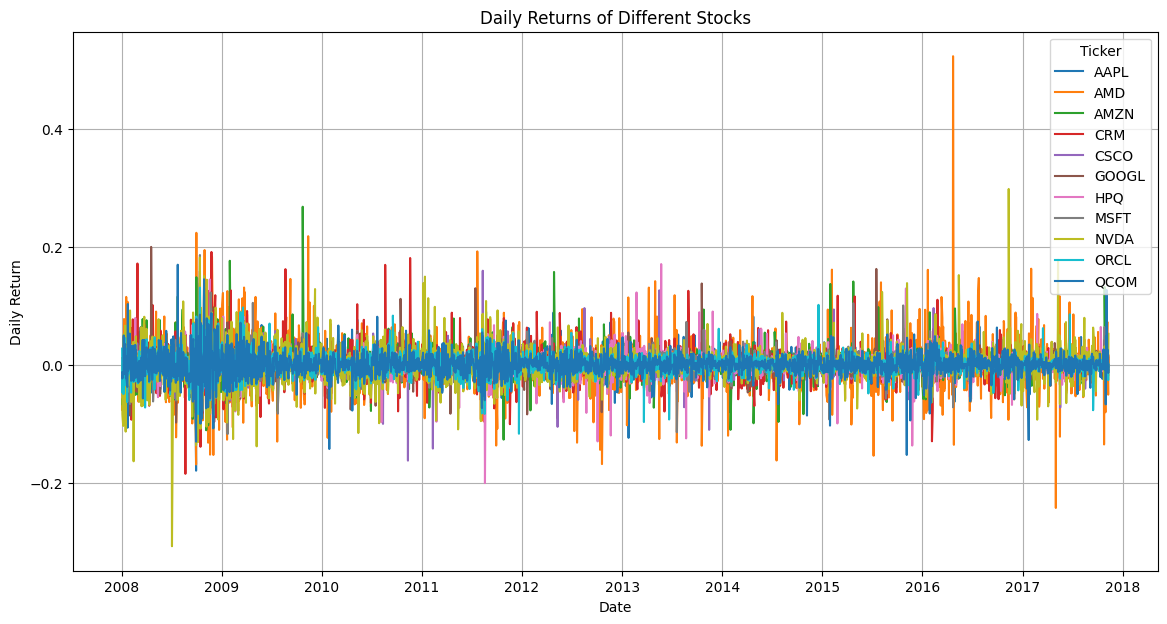

In [5]:
# Plotting
plt.figure(figsize=(14, 7))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column)

plt.title('Daily Returns of Different Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend(title='Ticker')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

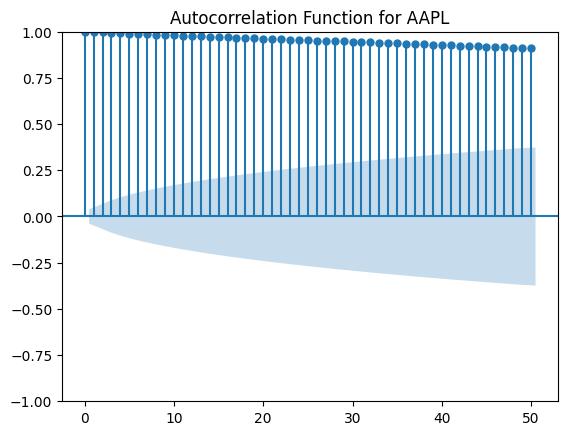

<Figure size 1200x600 with 0 Axes>

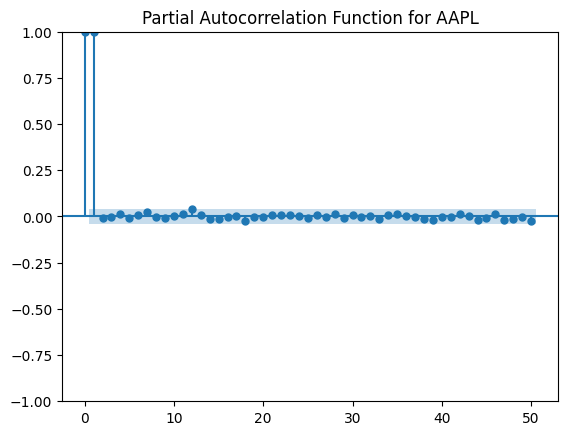

<Figure size 1200x600 with 0 Axes>

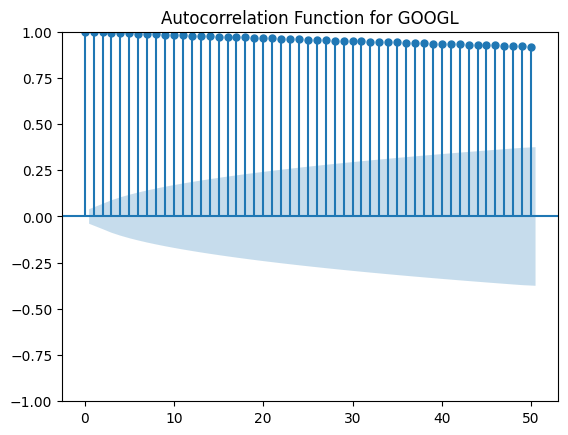

<Figure size 1200x600 with 0 Axes>

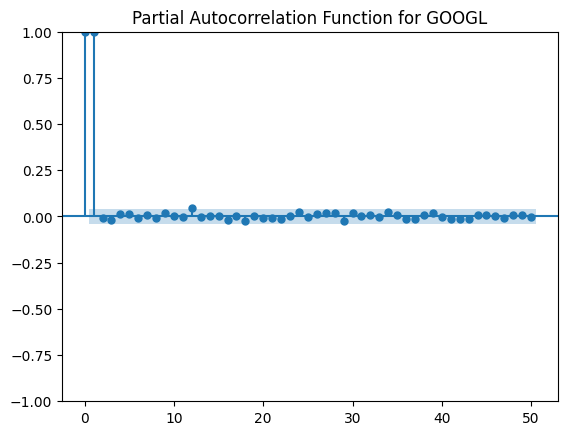

<Figure size 1200x600 with 0 Axes>

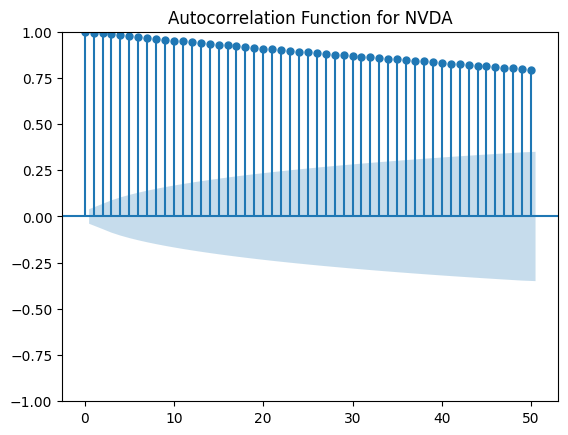

<Figure size 1200x600 with 0 Axes>

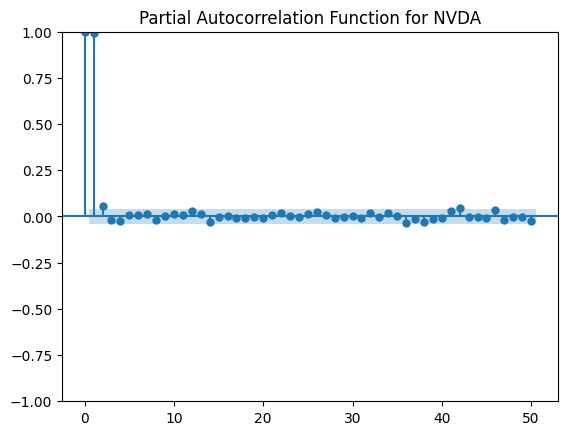

<Figure size 1200x600 with 0 Axes>

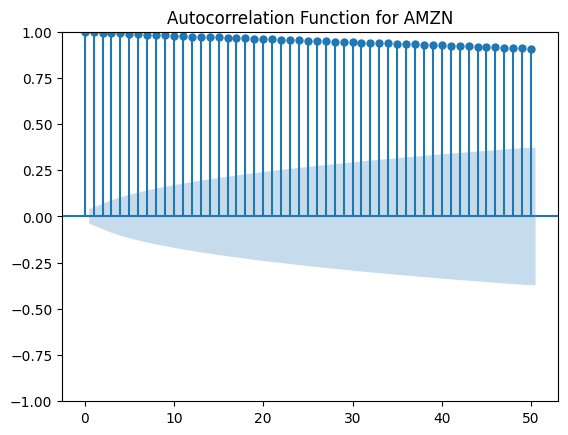

<Figure size 1200x600 with 0 Axes>

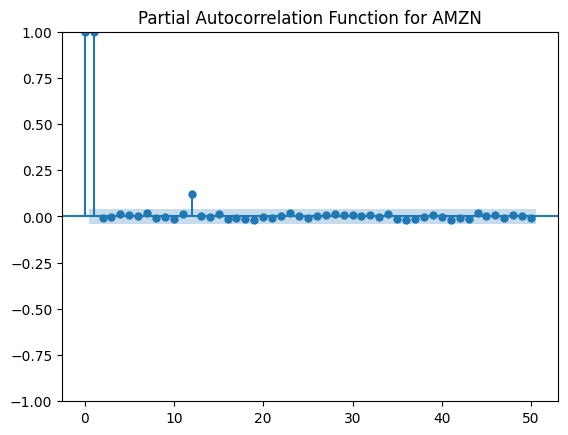

<Figure size 1200x600 with 0 Axes>

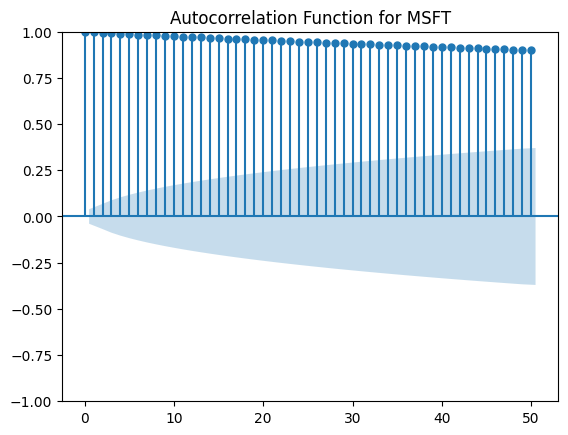

<Figure size 1200x600 with 0 Axes>

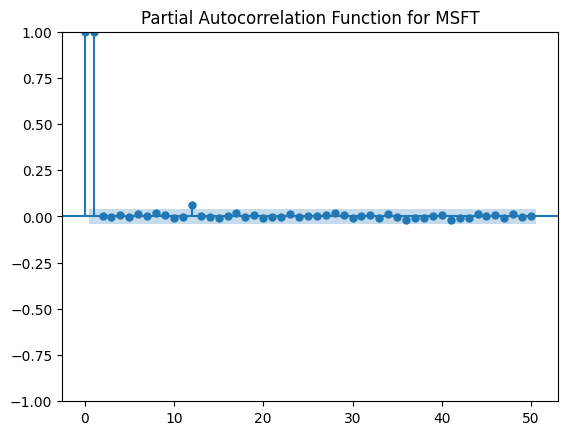

<Figure size 1200x600 with 0 Axes>

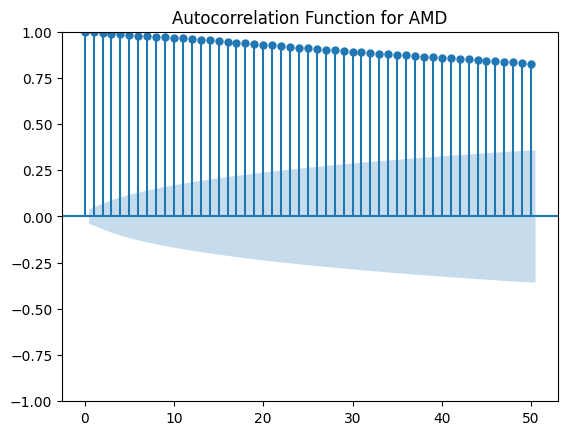

<Figure size 1200x600 with 0 Axes>

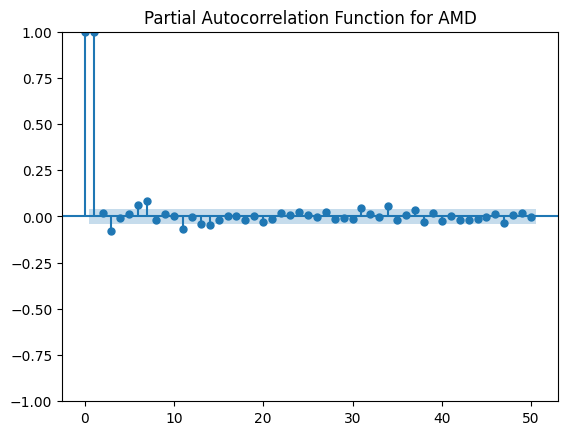

<Figure size 1200x600 with 0 Axes>

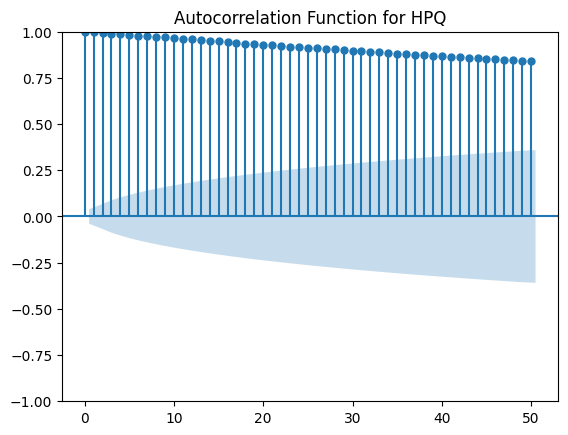

<Figure size 1200x600 with 0 Axes>

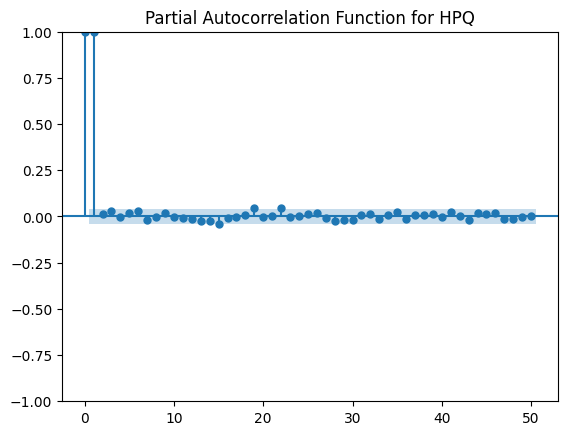

<Figure size 1200x600 with 0 Axes>

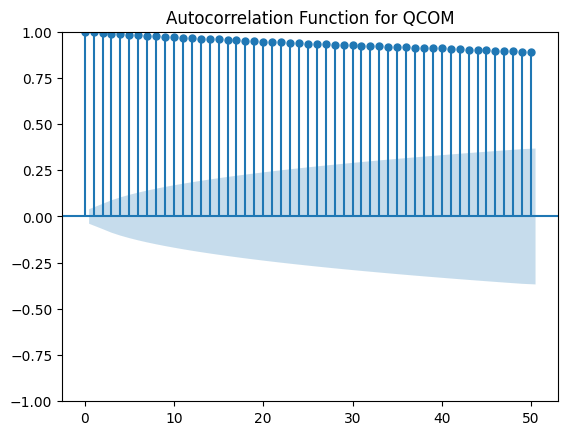

<Figure size 1200x600 with 0 Axes>

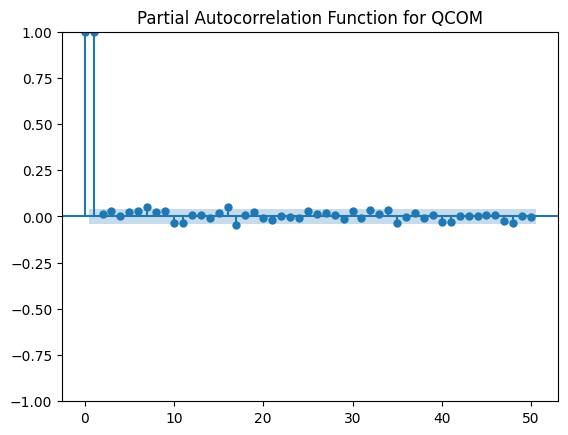

<Figure size 1200x600 with 0 Axes>

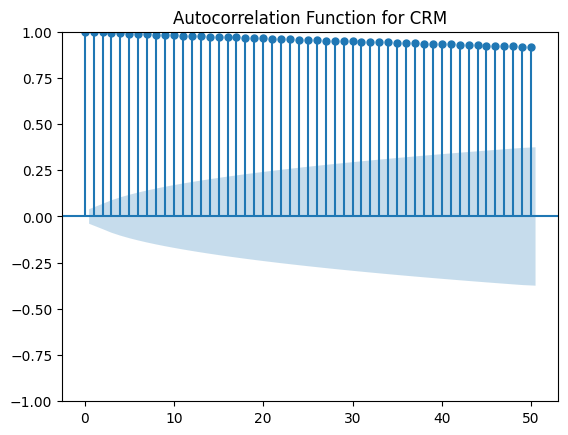

<Figure size 1200x600 with 0 Axes>

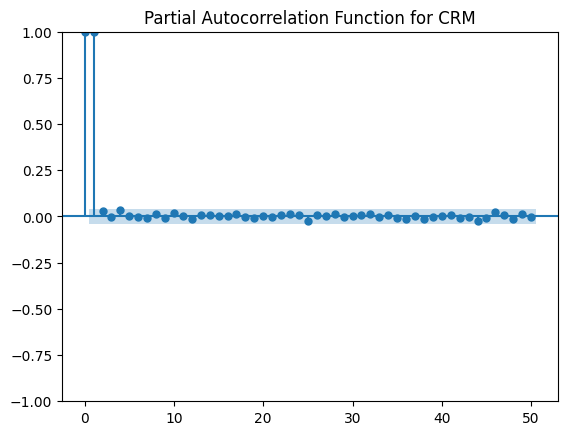

<Figure size 1200x600 with 0 Axes>

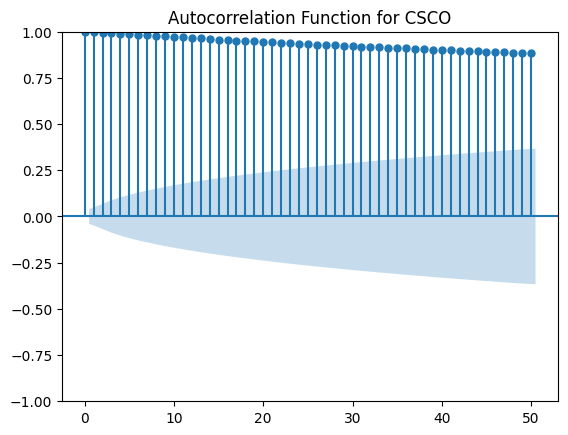

<Figure size 1200x600 with 0 Axes>

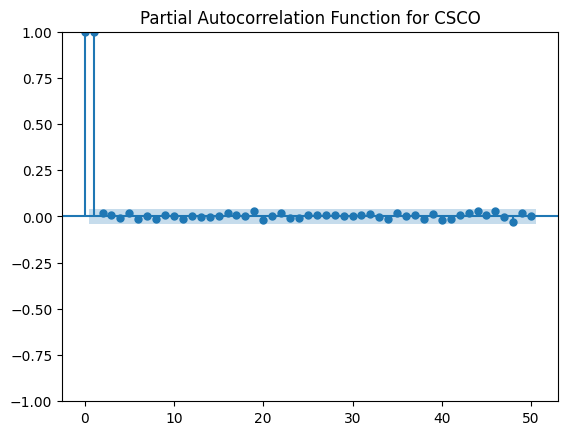

<Figure size 1200x600 with 0 Axes>

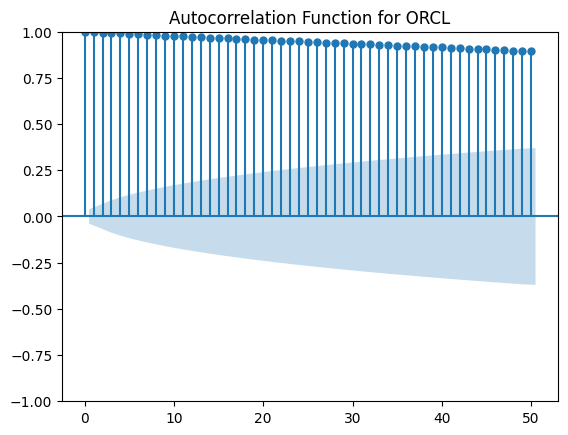

<Figure size 1200x600 with 0 Axes>

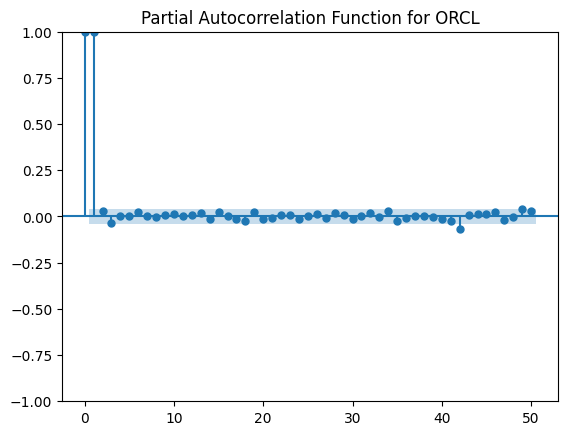

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Convert 'Date' to datetime if it's your DataFrame index or a column
selected_data['Date'] = pd.to_datetime(selected_data['Date'])
df.set_index('Date', inplace=True)

# List of unique tickers
tickers = selected_data['Ticker'].unique()

# Loop through each ticker and plot ACF and PACF
for ticker in tickers:
    data = selected_data[selected_data['Ticker'] == ticker]['Close']

    # Plot ACF
    plt.figure(figsize=(12, 6))
    plot_acf(data, lags=50, title=f'Autocorrelation Function for {ticker}')
    plt.show()

    # Plot PACF
    plt.figure(figsize=(12, 6))
    plot_pacf(data, lags=50, title=f'Partial Autocorrelation Function for {ticker}')
    plt.show()


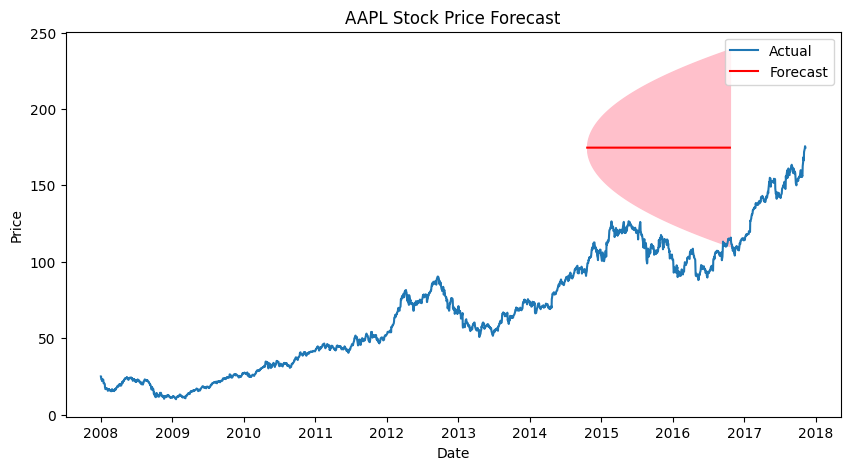

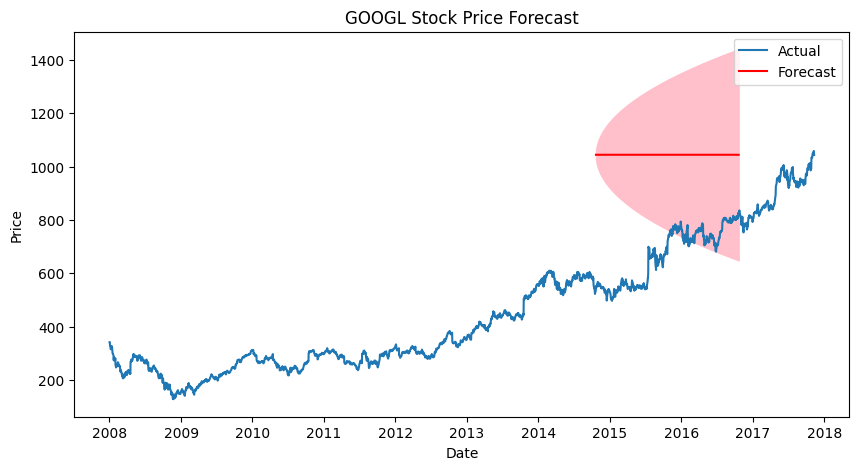

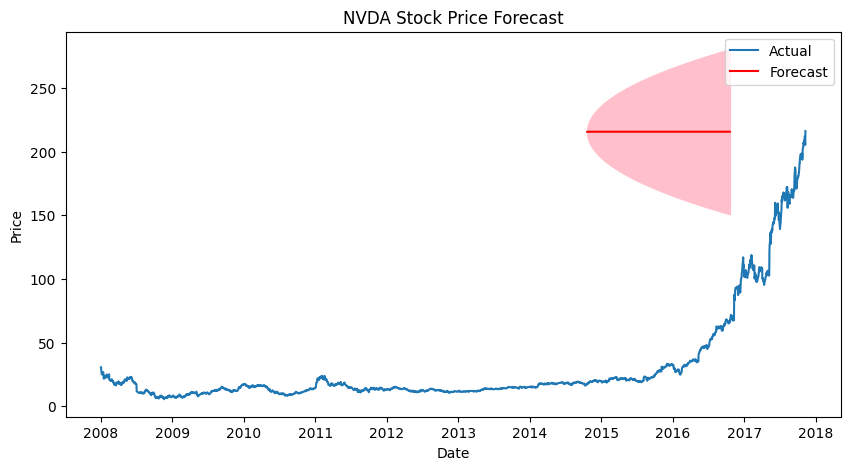

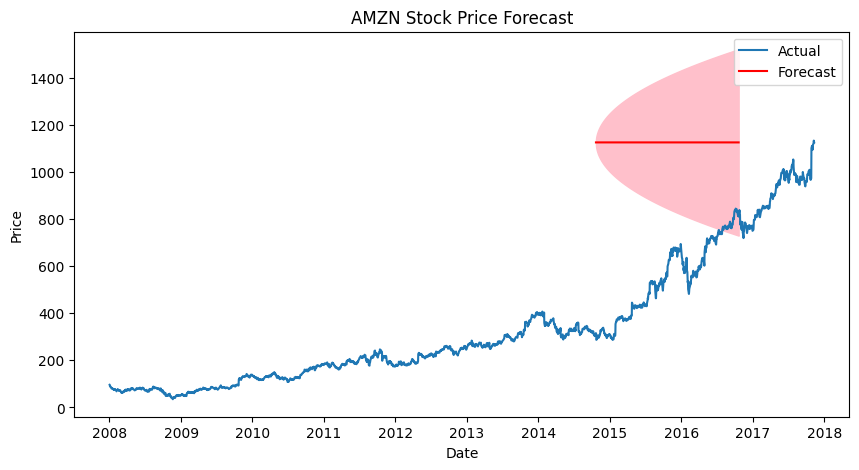

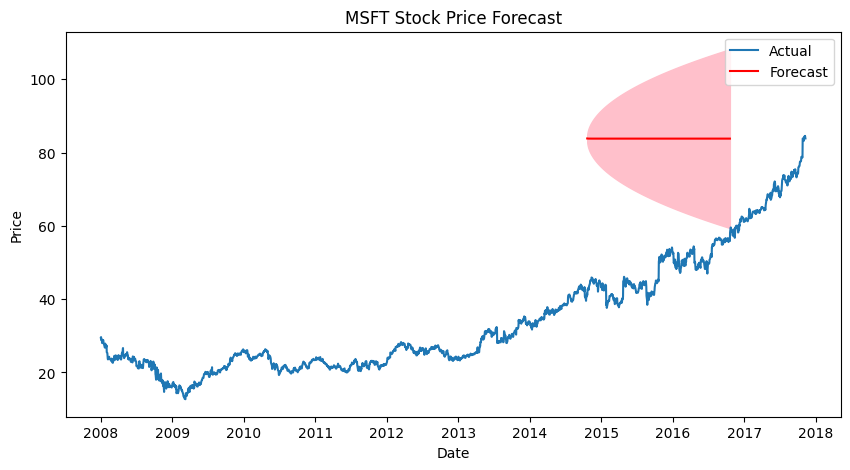

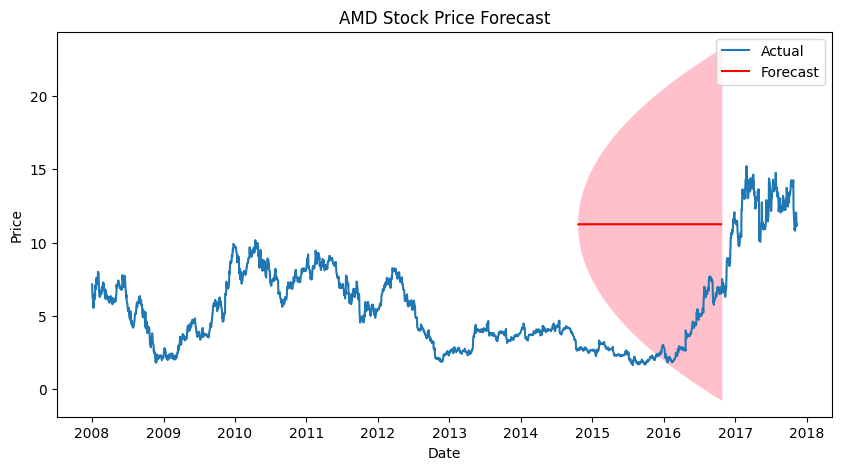

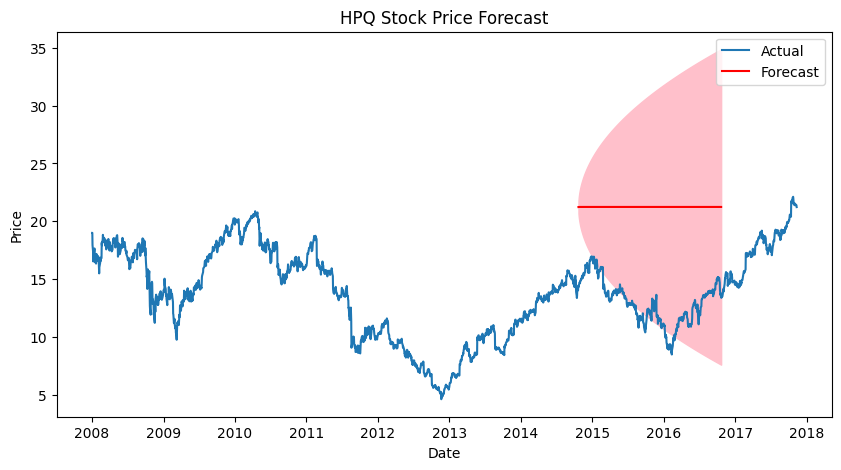

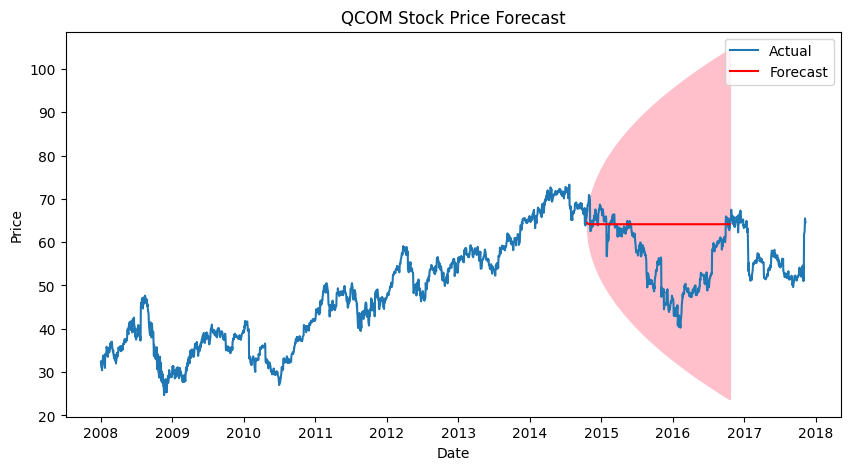

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


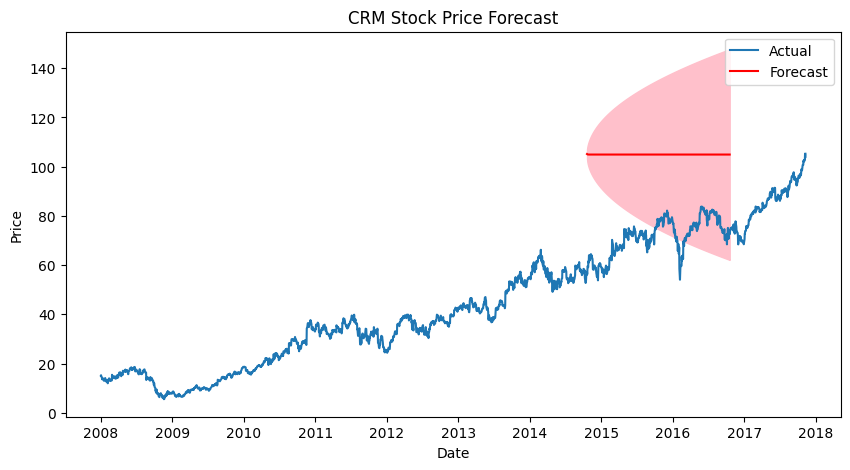

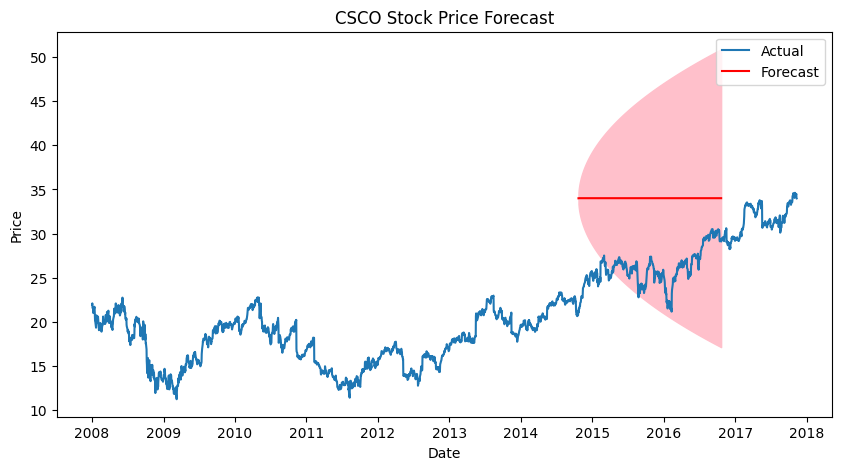

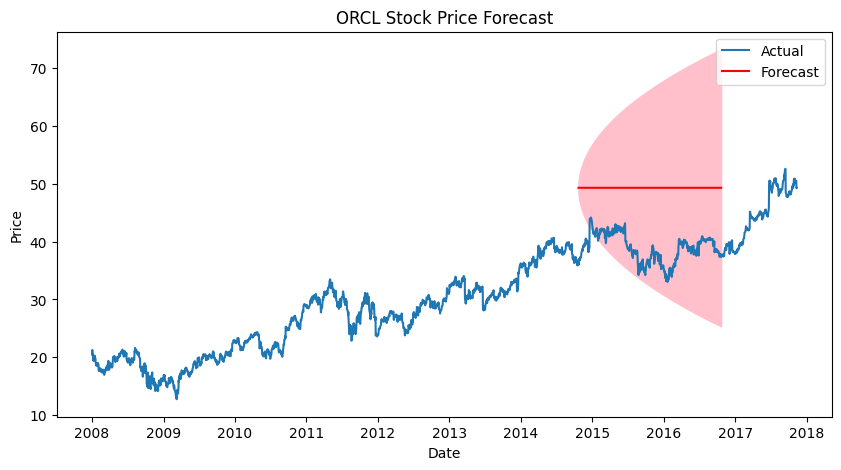

In [7]:
from statsmodels.tsa.arima.model import ARIMA


# Convert 'Date' to datetime type and set it as the DataFrame index
selected_data['Date'] = pd.to_datetime(selected_data['Date'])
selected_data.set_index('Date', inplace=True)
selected_data.index = pd.DatetimeIndex(selected_data.index).to_period('D')  # Assuming daily data

# List of tickers
tickers = ['aapl', 'googl', 'nvda', 'amzn', 'msft', 'amd', 'hpq', 'qcom', 'crm', 'csco', 'orcl']

# Iterate through each ticker
for ticker in tickers:
    selected_data_ticker = selected_data[selected_data['Ticker'].str.lower() == ticker.lower()]
    closing_prices = selected_data_ticker['Close']

    # Fit an ARIMA model (potentially adjust p, d, q based on data characteristics)
    model = ARIMA(closing_prices, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecasting
    forecast = model_fit.get_forecast(steps=365*2)  # 2 years
    mean_forecast = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()

    # Convert PeriodIndex to DateTimeIndex for plotting
    closing_prices.index = closing_prices.index.to_timestamp()
    mean_forecast.index = mean_forecast.index.to_timestamp()

    # Plotting the results
    plt.figure(figsize=(10, 5))
    plt.plot(closing_prices.index, closing_prices, label='Actual')
    plt.plot(mean_forecast.index, mean_forecast, color='red', label='Forecast')
    plt.fill_between(mean_forecast.index,
                     confidence_intervals['lower Close'],
                     confidence_intervals['upper Close'], color='pink')
    plt.title(f'{ticker.upper()} Stock Price Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()